# Graph Isomorphism Problem

**Graph Isomorphism Problem** (or GI, for short) concerns two finite graphs, whether they are isomorphic or not. A graph is **isomorphic** when the graph can have more than one form, with:

* the same number of edges,
* the same number of nodes, 
* each node has the same number of degree as its exact same node in another graph
* a bijection that when one node is linked to another node in another graph, that link equates to one exists in the edges of both graphs

In this case, **Graph Isomorphism Problem** involves how to determine if the graphs are isomorphic or not, fulfilling conditions above. This would involve making combinations of bijections to determine the isomorphic nature of the graphs. The combinations make would increase in a factorial number, depending on the amount of nodes, (e.g. 5 nodes will have 5! possible combinations) if done in a brute force method.

## Determining the Isomorphic Nature
To determine the isomorphic nature, let's set an example of a simple 3 node grpah, and its isomorphic graph.

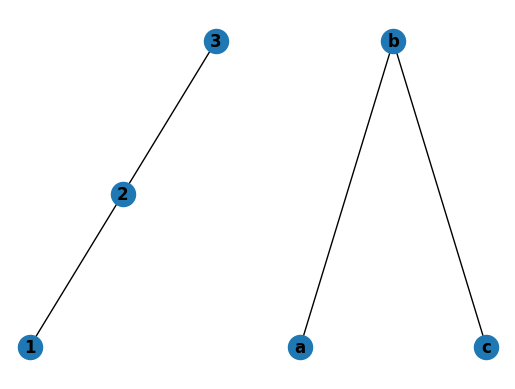

In [28]:
# Do "pip install networkx" and "pip install matplotlib" first to get the full functionalities 
import networkx as nx
import matplotlib.pyplot as plt


# First Graph
G = nx.Graph()
GE = [(1, 2), (2, 3)] # Add edges

G.add_nodes_from([
    (1, {"color": "red"}),
    (2, {"color": "green"}),
    (3, {"color": "blue"})
])
G.add_edges_from(GE)

# Second Graph
H = nx.Graph()
HE = [("a", "b"), ("b", "c")]

H.add_nodes_from([
    ("a", {"color": "red"}),
    ("b", {"color": "green"}),
    ("c", {"color": "blue"})
])

H.add_edges_from(HE)

subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
subax2 = plt.subplot(122)
nx.draw_spectral(H, with_labels=True, font_weight='bold')

The graphs are examined first with the two conditions: the same number of edges, and the same number of nodes

In [29]:
# Same number of nodes
len(list(G.nodes)) == len(list(H.nodes))

True

In [30]:
# Same number of edges
len(list(G.edges)) == len(list(H.edges))

True

As seen in those code above, the nodes and edges have the same numbers of nodes and edges. With this, we can move on to determining the isomorphic nature via analysing each combination of the graphs relationship.

In [31]:
import itertools as it

# Firstly, we will need to get all the permutations of another graph, in this case, H.
HP = list(it.permutations(list(H.nodes),3))

HP

[('a', 'b', 'c'),
 ('a', 'c', 'b'),
 ('b', 'a', 'c'),
 ('b', 'c', 'a'),
 ('c', 'a', 'b'),
 ('c', 'b', 'a')]

In [32]:
# Then, map each permutation with the nodes from the previous graph, G
for i in range(len(HP)):
    HP[i] = dict(zip(HP[i],G.nodes))

HP

[{'a': 1, 'b': 2, 'c': 3},
 {'a': 1, 'c': 2, 'b': 3},
 {'b': 1, 'a': 2, 'c': 3},
 {'b': 1, 'c': 2, 'a': 3},
 {'c': 1, 'a': 2, 'b': 3},
 {'c': 1, 'b': 2, 'a': 3}]

In [59]:
# After which, subsitute the edges for each possible permutations with the ones from dictionary above
HR = list()
for i in range(len(HP)): # Run through each permutation
    HT = list()
    for j in range(len(HE)): # Run through each edge
        HU = list()
        for k in range(len(HE[j])): # For each node in an edge
            HU.append(HP[i][HE[j][k]]) # Subsitute graph H with Graph G
        HT.append(tuple(HU))
    HR.append(HT)

HR

[[(1, 2), (2, 3)],
 [(1, 3), (3, 2)],
 [(2, 1), (1, 3)],
 [(3, 1), (1, 2)],
 [(2, 3), (3, 1)],
 [(3, 2), (2, 1)]]

In [61]:
# Compare each edges for each permutation to the one in the previous graph (G)
for i in range(len(HR)):
    if (HR[i] == GE): # If a permutation of edges is the same as with the previous graph's edges, print out the message
        print("Isomorphism found.")
        break
    elif (i == len(HR)-1):
        print("Isomorphism not found.")

Isomorphism found.


---

End of notebook